In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
df=pd.read_csv("/content/new.csv")
df

,Unnamed: 0,date,open,high,low,close,volume
0,0,02-01-2015,314.079010,315.838989,313.565002,315.032013,7.860650e+06
1,1,03-01-2015,314.846008,315.149994,281.082001,281.082001,3.305440e+07
2,2,04-01-2015,281.145996,287.230011,257.612000,264.195007,5.562910e+07
3,3,05-01-2015,265.084015,278.341003,265.084015,274.473999,4.396280e+07
4,4,06-01-2015,274.610992,287.553009,272.696014,286.188995,2.324570e+07
...,...,...,...,...,...,...,...
3281,3281,27-12-2023,42518.468750,43683.160160,42167.582030,43442.855470,2.526094e+10
3282,3282,28-12-2023,43468.199220,43804.781250,42318.550780,42627.855470,2.299209e+10
3283,3283,29-12-2023,42614.644530,43124.324220,41424.062500,42099.402340,2.600002e+10
3284,3284,30-12-2023,42091.753910,42584.125000,41556.226560,42156.902340,1.601393e+10


In [ ]:
#To remove the unnamed column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
print(df.head())

         date        open        high         low       close      volume
0  02-01-2015  314.079010  315.838989  313.565002  315.032013   7860650.0
1  03-01-2015  314.846008  315.149994  281.082001  281.082001  33054400.0
2  04-01-2015  281.145996  287.230011  257.612000  264.195007  55629100.0
3  05-01-2015  265.084015  278.341003  265.084015  274.473999  43962800.0
4  06-01-2015  274.610992  287.553009  272.696014  286.188995  23245700.0


In [ ]:
#Displays some rows from start.
df.head()

,date,open,high,low,close,volume
0,02-01-2015,314.079010,315.838989,313.565002,315.032013,7860650.0
1,03-01-2015,314.846008,315.149994,281.082001,281.082001,33054400.0
2,04-01-2015,281.145996,287.230011,257.612000,264.195007,55629100.0
3,05-01-2015,265.084015,278.341003,265.084015,274.473999,43962800.0
4,06-01-2015,274.610992,287.553009,272.696014,286.188995,23245700.0


In [ ]:
#Filled NaN values with null value
df.tail()
df=df.fillna(0)
df

,date,open,high,low,close,volume
0,02-01-2015,314.079010,315.838989,313.565002,315.032013,7860650.0
1,03-01-2015,314.846008,315.149994,281.082001,281.082001,33054400.0
2,04-01-2015,281.145996,287.230011,257.612000,264.195007,55629100.0
3,05-01-2015,265.084015,278.341003,265.084015,274.473999,43962800.0
4,06-01-2015,274.610992,287.553009,272.696014,286.188995,23245700.0
...,...,...,...,...,...,...
3401,0,0.000000,0.000000,0.000000,0.000000,0.0
3402,0,0.000000,0.000000,0.000000,0.000000,0.0
3403,0,0.000000,0.000000,0.000000,0.000000,0.0
3404,0,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# If there is any invalid date or incorrectly formatted date, this option,
# replaces it with NaT (Not a Time), so our code doesn’t break.
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df

,date,open,high,low,close,volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0
...,...,...,...,...,...,...
3401,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3402,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3403,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3404,NaT,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# used to convert the 'date' column in your the DataFrame from a string,
# (text) format to a DateTime object in Pandas.
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,open,high,low,close,volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0
...,...,...,...,...,...,...
3401,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3402,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3403,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3404,NaT,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
#used to sort the rows of DataFrame based on the values in the 'date' column.
df =df.sort_values(by='date')
df


,date,open,high,low,close,volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0
...,...,...,...,...,...,...
3401,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3402,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3403,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3404,NaT,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# used to convert the 'close', 'high', and 'low' columns in DataFrame from
# strings (text) to numeric data types (like integers or floats)
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df

,date,open,high,low,close,volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0
...,...,...,...,...,...,...
3401,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3402,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3403,NaT,0.000000,0.000000,0.000000,0.000000,0.0
3404,NaT,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# Calculates the percentage change in the closing price from one day to the
# next. This is commonly called the daily return.
df['daily_return'].fillna(0, inplace=True)

#Calculates the difference between the highest and lowest prices of Bitcoin for each day.
df['price_range'] = df['high'] - df['low']

#Calculates the average price for the day, based on the high and low prices.
df['average_price'] = (df['high'] + df['low']) / 2
print(df.head())

        date        open        high         low       close      volume  \
0 2015-01-02  314.079010  315.838989  313.565002  315.032013   7860650.0   
1 2015-01-03  314.846008  315.149994  281.082001  281.082001  33054400.0   
2 2015-01-04  281.145996  287.230011  257.612000  264.195007  55629100.0   
3 2015-01-05  265.084015  278.341003  265.084015  274.473999  43962800.0   
4 2015-01-06  274.610992  287.553009  272.696014  286.188995  23245700.0   

   daily_return  price_range  average_price  
0      0.000000     2.273987     314.701996  
1     -0.107767    34.067993     298.115997  
2     -0.060079    29.618011     272.421005  
3      0.038907    13.256988     271.712509  
4      0.042682    14.856995     280.124511  


In [ ]:
df = df.dropna()
df = df.fillna(0)
df


,date,open,high,low,close,volume,daily_return,price_range,average_price
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7.860650e+06,0.000000,2.273987,314.701996
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,3.305440e+07,-0.107767,34.067993,298.115997
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,5.562910e+07,-0.060079,29.618011,272.421005
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,4.396280e+07,0.038907,13.256988,271.712509
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,2.324570e+07,0.042682,14.856995,280.124511
...,...,...,...,...,...,...,...,...,...
3281,2023-12-27,42518.468750,43683.160160,42167.582030,43442.855470,2.526094e+10,0.021694,1515.578130,42925.371095
3282,2023-12-28,43468.199220,43804.781250,42318.550780,42627.855470,2.299209e+10,-0.018760,1486.230470,43061.666015
3283,2023-12-29,42614.644530,43124.324220,41424.062500,42099.402340,2.600002e+10,-0.012397,1700.261720,42274.193360
3284,2023-12-30,42091.753910,42584.125000,41556.226560,42156.902340,1.601393e+10,0.001366,1027.898440,42070.175780


In [ ]:
#used to resample your data from daily to weekly, aggregating the data for each week.
df_weekly = df.resample('W', on='date').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'daily_return': 'mean',
    'price_range': 'mean',
    'average_price': 'mean'
})
df_weekly

,open,high,low,close,volume,daily_return,price_range,average_price
date,,,,,,,,
2015-01-04,314.079010,315.838989,257.612000,264.195007,9.654415e+07,-0.055948,21.986664,295.079666
2015-01-11,265.084015,298.753998,265.039001,265.660004,1.642415e+08,0.001519,13.584290,281.445291
2015-01-18,266.145996,272.203003,171.509995,210.339005,3.631122e+08,-0.025282,31.827573,219.151645
2015-01-25,211.470993,255.074005,205.153000,253.718002,1.891655e+08,0.027589,12.239999,227.437857
2015-02-01,254.078995,309.384003,212.014999,226.972000,3.068405e+08,-0.014117,27.340142,243.191931
...,...,...,...,...,...,...,...,...
2023-12-03,37454.191410,40135.605470,36750.128910,39978.390630,1.343601e+11,0.009330,977.035157,38254.961776
2023-12-10,39978.628910,44705.515630,39978.628910,43779.699220,1.885036e+11,0.013370,1440.783479,43306.775671
2023-12-17,43792.019530,43808.375000,40234.578130,41364.664060,1.684935e+11,-0.007688,1821.837611,42059.022043


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
open,0
high,0
low,0
close,0
volume,0


In [ ]:
# Converts the 'open', 'high', 'low', 'close', and 'volume' columns to numeric
# data types. This ensures that any non-numeric values are either turned into
# proper numbers or replaced with NaN (Not a Number) if the conversion fails.
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
df

,date,open,high,low,close,volume,daily_return,price_range,average_price
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7.860650e+06,0.000000,2.273987,314.701996
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,3.305440e+07,-0.107767,34.067993,298.115997
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,5.562910e+07,-0.060079,29.618011,272.421005
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,4.396280e+07,0.038907,13.256988,271.712509
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,2.324570e+07,0.042682,14.856995,280.124511
...,...,...,...,...,...,...,...,...,...
3281,2023-12-27,42518.468750,43683.160160,42167.582030,43442.855470,2.526094e+10,0.021694,1515.578130,42925.371095
3282,2023-12-28,43468.199220,43804.781250,42318.550780,42627.855470,2.299209e+10,-0.018760,1486.230470,43061.666015
3283,2023-12-29,42614.644530,43124.324220,41424.062500,42099.402340,2.600002e+10,-0.012397,1700.261720,42274.193360
3284,2023-12-30,42091.753910,42584.125000,41556.226560,42156.902340,1.601393e+10,0.001366,1027.898440,42070.175780


In [ ]:
# Drop or fill any NaN values before scaling
df = df.dropna()
df

,date,open,high,low,close,volume,daily_return,price_range,average_price
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7.860650e+06,0.000000,2.273987,314.701996
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,3.305440e+07,-0.107767,34.067993,298.115997
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,5.562910e+07,-0.060079,29.618011,272.421005
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,4.396280e+07,0.038907,13.256988,271.712509
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,2.324570e+07,0.042682,14.856995,280.124511
...,...,...,...,...,...,...,...,...,...
3281,2023-12-27,42518.468750,43683.160160,42167.582030,43442.855470,2.526094e+10,0.021694,1515.578130,42925.371095
3282,2023-12-28,43468.199220,43804.781250,42318.550780,42627.855470,2.299209e+10,-0.018760,1486.230470,43061.666015
3283,2023-12-29,42614.644530,43124.324220,41424.062500,42099.402340,2.600002e+10,-0.012397,1700.261720,42274.193360
3284,2023-12-30,42091.753910,42584.125000,41556.226560,42156.902340,1.601393e+10,0.001366,1027.898440,42070.175780


In [ ]:
# MinMaxScaler is used to scale the numeric columns ('open', 'high', 'low',
# 'close', 'volume') to a range between 0 and 1.
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])
df

,date,open,high,low,close,volume,daily_return,price_range,average_price
0,2015-01-02,0.002036,0.001518,0.002146,0.002032,0.000000,0.000000,2.273987,314.701996
1,2015-01-03,0.002048,0.001508,0.001655,0.001528,0.000072,-0.107767,34.067993,298.115997
2,2015-01-04,0.001547,0.001101,0.001300,0.001278,0.000136,-0.060079,29.618011,272.421005
3,2015-01-05,0.001309,0.000971,0.001413,0.001430,0.000103,0.038907,13.256988,271.712509
4,2015-01-06,0.001450,0.001106,0.001528,0.001604,0.000044,0.042682,14.856995,280.124511
...,...,...,...,...,...,...,...,...,...
3281,2023-12-27,0.628467,0.633899,0.634281,0.642018,0.071948,0.021694,1515.578130,42925.371095
3282,2023-12-28,0.642563,0.635672,0.636561,0.629924,0.065484,-0.018760,1486.230470,43061.666015
3283,2023-12-29,0.629894,0.625750,0.623051,0.622082,0.074053,-0.012397,1700.261720,42274.193360
3284,2023-12-30,0.622133,0.617872,0.625047,0.622935,0.045602,0.001366,1027.898440,42070.175780


In [ ]:
# Display the scaled dataframe
print(df.head())

        date      open      high       low     close    volume  daily_return  \
0 2015-01-02  0.002036  0.001518  0.002146  0.002032  0.000000      0.000000   
1 2015-01-03  0.002048  0.001508  0.001655  0.001528  0.000072     -0.107767   
2 2015-01-04  0.001547  0.001101  0.001300  0.001278  0.000136     -0.060079   
3 2015-01-05  0.001309  0.000971  0.001413  0.001430  0.000103      0.038907   
4 2015-01-06  0.001450  0.001106  0.001528  0.001604  0.000044      0.042682   

   price_range  average_price  
0     2.273987     314.701996  
1    34.067993     298.115997  
2    29.618011     272.421005  
3    13.256988     271.712509  
4    14.856995     280.124511  


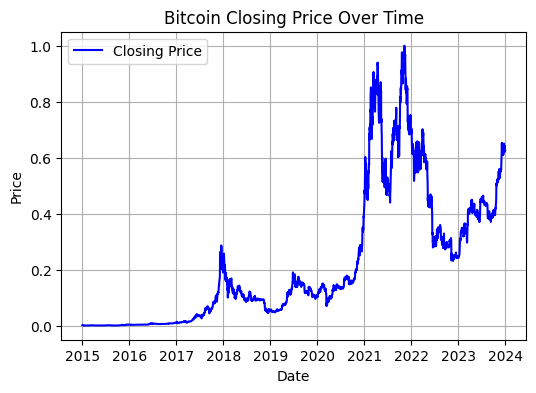

In [ ]:
# Plot the closing price over time
plt.figure(figsize=(6, 4))

#df['date']: The x-axis represents the date.
#df['close']: The y-axis represents the closing price of Bitcoin.
plt.plot(df['date'], df['close'], label='Closing Price', color='blue')

#xlabel('Date'): X-axis shows time (dates).
plt.xlabel('Date')
#ylabel('Price'): Y-axis shows Bitcoin price.
plt.ylabel('Price')
plt.title('Bitcoin Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


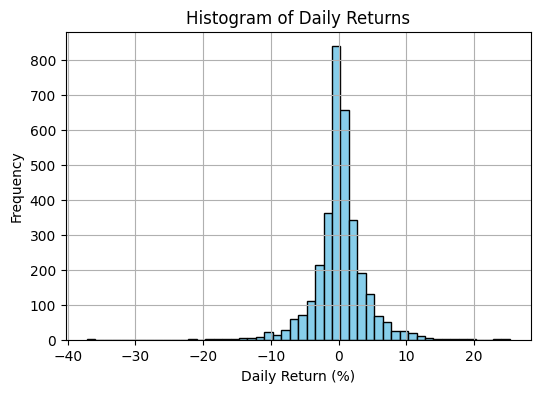

In [ ]:
# Plot histogram of daily returns
plt.figure(figsize=(6, 4))

#df['daily_return']: Data for daily returns.
#.dropna(): Removes any NaN values before plotting.
#* 100: Converts the daily returns from decimal to percentage form (e.g., 0.05 becomes 5%).
#bins=50: Specifies that the histogram should use 50 bins (intervals) to group the data.
plt.hist(df['daily_return'].dropna() * 100, bins=50, edgecolor='black', color='skyblue')

#xlabel('Daily Return (%)'): Indicates that the x-axis represents daily returns in percentage form.
plt.xlabel('Daily Return (%)')
#ylabel('Frequency'): Indicates that the y-axis represents how often each range of returns occurs.
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')

#Adds a grid to the plot.
plt.grid(True)
plt.show()

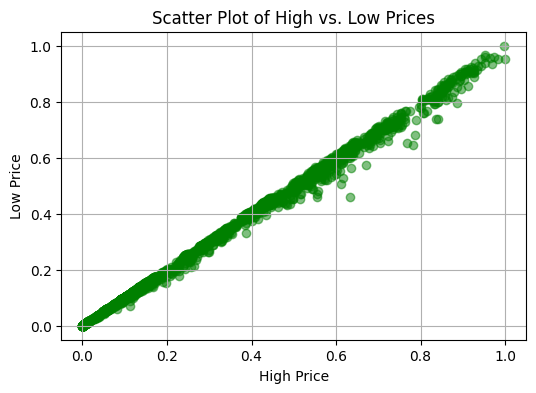

In [ ]:
# Scatter plot of high vs. low prices
plt.figure(figsize=(6, 4))

#new_df['high']: The x-axis represents the high prices.
#new_df['low']: The y-axis represents the low prices.
#alpha=0.5: Sets the transparency of the points. An alpha value of 0.5 makes
#the points semi-transparent, which helps in visualizing overlapping points.
plt.scatter(df['high'], df['low'], alpha=0.5, color='green')

#xlabel('High Price'): Indicates that the x-axis represents high prices.
plt.xlabel('High Price')

#ylabel('Low Price'): Indicates that the y-axis represents low prices
plt.ylabel('Low Price')
plt.title('Scatter Plot of High vs. Low Prices')
plt.grid(True)
plt.show()


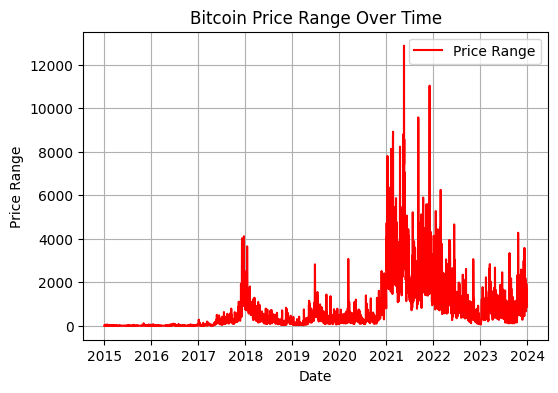

In [ ]:
# Plot price range over time
plt.figure(figsize=(6, 4))

#df['date']: The x-axis represents the dates
#df['price_range']: The y-axis represents the price range for each day
#(the difference between the high and low prices).
plt.plot(df['date'], df['price_range'], label='Price Range', color='red')

#xlabel('Date'): Indicates that the x-axis represents dates.
plt.xlabel('Date')

#ylabel('Price Range'): Indicates that the y-axis represents the price range.
plt.ylabel('Price Range')
plt.title('Bitcoin Price Range Over Time')
plt.legend()
plt.grid(True)
plt.show()

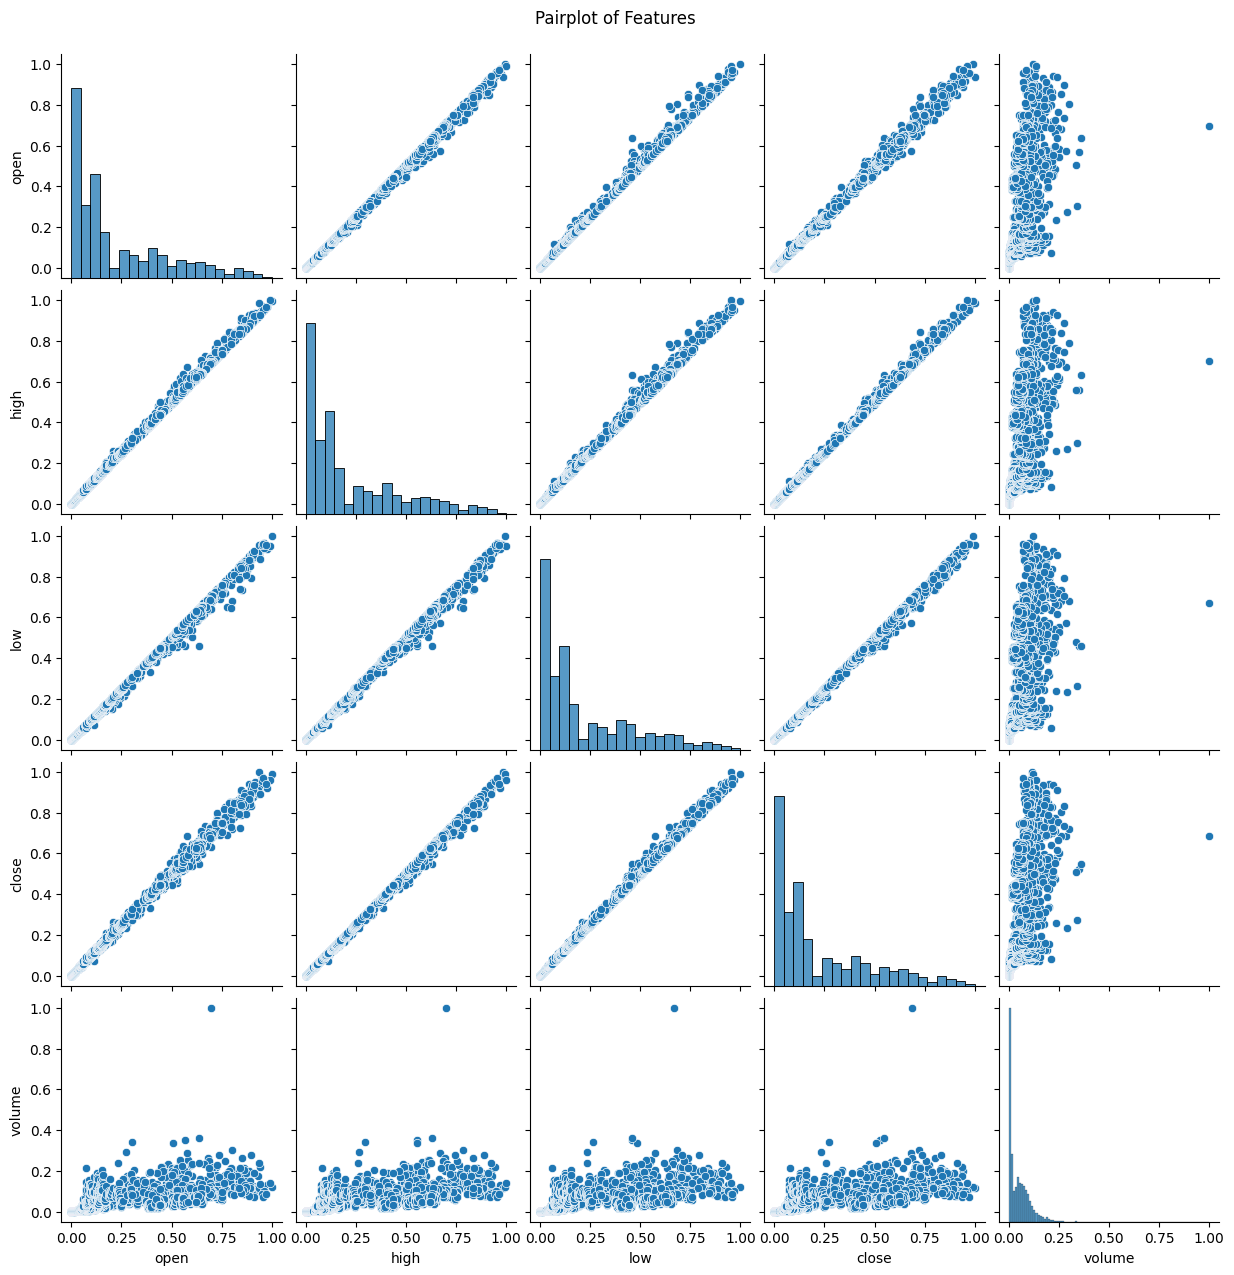

In [ ]:
# Create pairplot for features
import seaborn as sns
#new_df[['open', 'high', 'low', 'close', 'volume']]: Selects the columns to include in the pairplot.
sns.pairplot(df[['open', 'high', 'low', 'close', 'volume']])

# plt.suptitle() is used to add a title above the pairplot. The y=1.02 argument
# moves the title slightly above the default position to prevent overlap with
# the plots.
plt.suptitle('Pairplot of Features', y=1.02)  # Adjust title position if needed
plt.show()


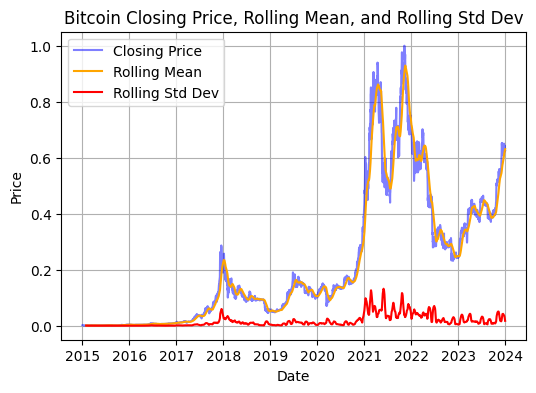

In [ ]:
# Calculate rolling mean and standard deviation
window = 30
#Rolling Mean: Calculates the average of the closing prices over a rolling window of 30 days.
df['rolling_mean'] = df['close'].rolling(window=window).mean()
#Rolling Standard Deviation (Std Dev): Calculates the standard deviation of the closing prices over the same rolling window.
df['rolling_std'] = df['close'].rolling(window=window).std()

# Plot rolling mean and std
plt.figure(figsize=(6, 4))

#Plots the actual closing prices with a semi-transparent blue line.
plt.plot(df['date'], df['close'], label='Closing Price', color='blue', alpha=0.5)

#Plots the rolling mean with an orange line, showing the smoothed average price over 30 days.
plt.plot(df['date'], df['rolling_mean'], label='Rolling Mean', color='orange')

#Plots the rolling standard deviation with a red line, showing the variability in the price over the same window.
plt.plot(df['date'], df['rolling_std'], label='Rolling Std Dev', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price, Rolling Mean, and Rolling Std Dev')
plt.legend()
plt.grid(True)
plt.show()